### Name : Anushka Kamath
### Github Username : anushkakamath
### USC email id : arkamath@usc.edu
### USC ID : 9418501008

# 1. (a) Download the Combined Cycle Power Plant data :

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

https://datatofish.com/read_excel/

In [11]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import figure

In [12]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1', header=0, names=None)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


# 1. (b) Exploring the data : 

i. How many rows are in this data set? How many columns? What do the rows and columns represent?

https://www.geeksforgeeks.org/count-the-number-of-rows-and-columns-of-a-pandas-dataframe/

In [13]:
count_row = df.shape[0]
count_col = df.shape[1]
print('Row count : {}, Column count : {}'.format(count_row, count_col))

Row count : 9568, Column count : 5


Each row gives a data point and the columns describe the features. Features consist of hourly average ambient variables -> Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH). The response variable -> net hourly electrical energy output (PE) of the plant.
The respose variable PE is calculated by regression model using the features AT,V,AP,RH

# 1. (b). 
ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

https://seaborn.pydata.org/tutorial/regression.html

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://www.geeksforgeeks.org/python-seaborn-pairplot-method/

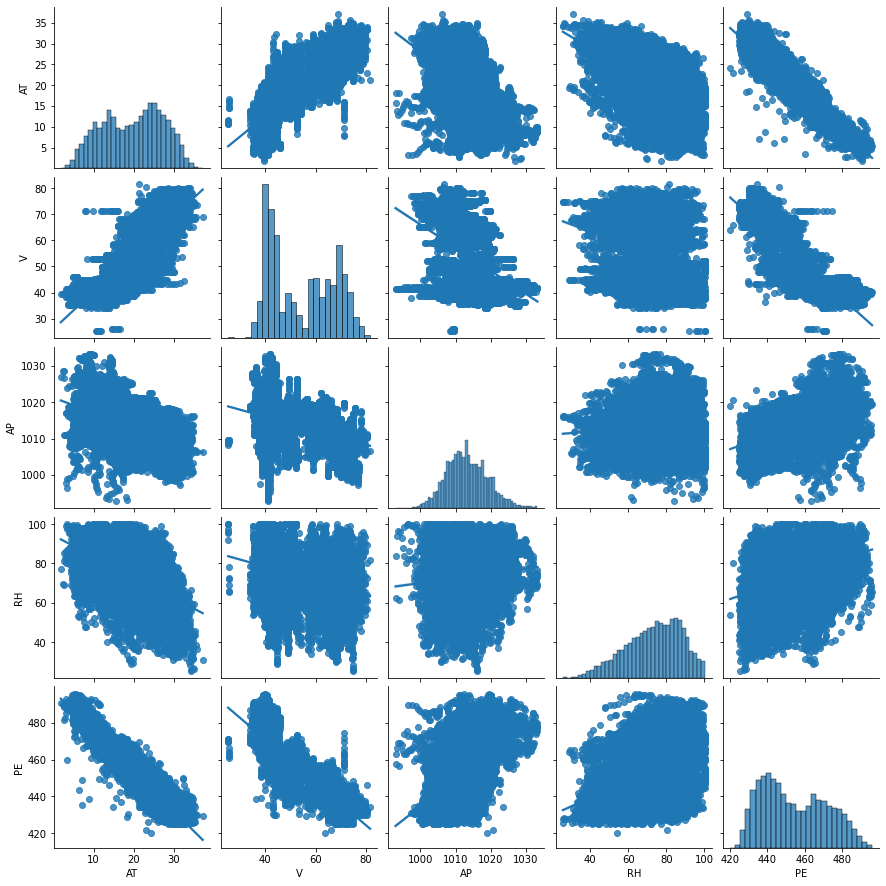

In [14]:
seaborn.pairplot(df, x_vars = ['AT', 'V', 'AP', 'RH', 'PE'], kind="reg")
plt.show()

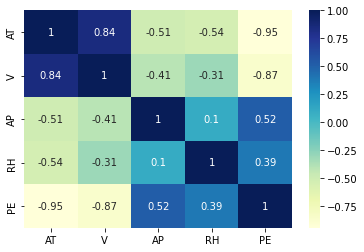

In [15]:
seaborn.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Predictors / Independent variables AT and V do not have a direct relationship with the Dependent variable PE. 
Whereas the independent variables do not seem to have a relationship with each other 

# 1. (b). iii.
What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/

https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/

https://erikrood.com/Python_References/pandas_column_average_median_final.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

In [16]:
desc = []

for i in df.columns:
    #print(i)
    #print(df[i].describe())
    MEAN = df[i].mean()
    MEDIAN = df[i].median()
    Q1 = np.percentile(df[i], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df[i], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    desc.append([MEAN, MEDIAN, Q1, Q3, IQR])
#     print('Mean for {} : {}'.format(i, MEAN))
#     print('Median for {} : {}'.format(i, MEDIAN))
#     print('First Quartiles for {} : {}'.format(i, Q1))
#     print('Third Quartiles for {} : {}'.format(i, Q3))
#     print('In - terquartile for {} : {}'.format(i, IQR))

cols = df.columns
desc_df = pd.DataFrame(desc, columns = ['Mean', 'Median', 'First Quartiles', 'Third Quartiles', 'In-terquartile']) 
desc_df1 = desc_df.set_index(cols)
print(desc_df1)

           Mean    Median  First Quartiles  Third Quartiles  In-terquartile
AT    19.651231    20.345           13.510            25.72          12.210
V     54.305804    52.080           41.740            66.54          24.800
AP  1013.259078  1012.940         1009.100          1017.26           8.160
RH    73.308978    74.975           63.325            84.83          21.505
PE   454.365009   451.550          439.750           468.43          28.680


# 1. (c)
For each predictor, fit a simple linear regression model to predict response

https://www.w3resource.com/pandas/dataframe/dataframe-drop.php

https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4

https://www.statsmodels.org/dev/index.html  

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.outlier_test.html

https://notebook.community/samuelsinayoko/kaggle-housing-prices/research/outlier_detection_statsmodels

https://stackoverflow.com/questions/19587932/remove-const-or-label-variables-using-statsmodels-api

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

https://www.mathworks.com/help/matlab/ref/scatter.html

Predictor :  AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:11:28   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3

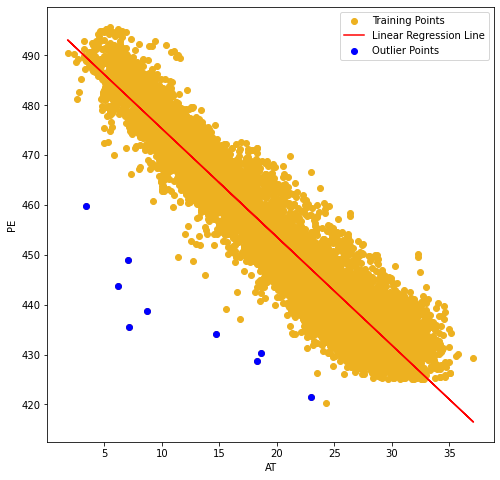

Predictor :  V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:11:40   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   13

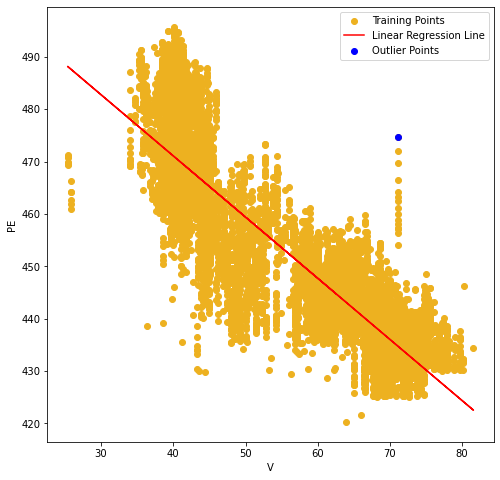

Predictor :  AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:11:51   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    

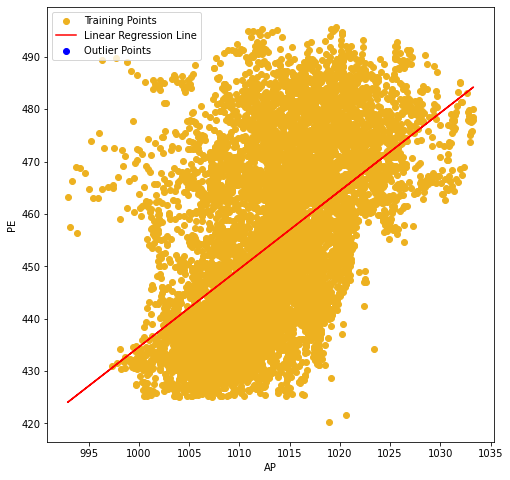

Predictor :  RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:12:02   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    

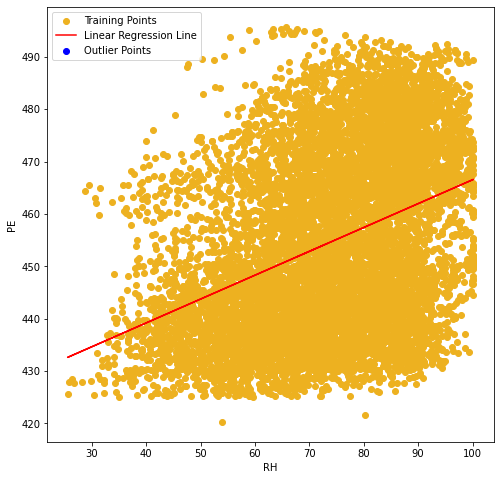

In [17]:
#USING OUTLIER TEST

model_params_const = []
model_params_slope = []
outliers_list = []
X_overall = df.drop(['PE'], axis=1)
y = df['PE']

for i in X_overall.columns:
    X = X_overall[i]
    X_sm = sm.add_constant(X)
    lr = sm.OLS(y, X_sm).fit()
    print("Predictor : ", i)
    const = lr.params['const']
    slope = lr.params[i]
    model_params_const.append(const)
    model_params_slope.append(slope)
    print(lr.summary())
    outliers = lr.outlier_test()
    out = outliers[outliers['bonf(p)'] < 0.05].index.values
    print("** Outlier points indices are : ", out)
    #print("Outlier points are : ({},{})".format(X[out], y[out]))
    figure(figsize=(8, 8))
    plt.scatter(X, y, color ='#EDB120', label='Training Points')
    #predictions are calculated by -> yhat = slope * x + intercept
    plt.plot(X, (slope * X) + const, color = 'r', label='Linear Regression Line')
    plt.scatter(X[out], y[out], color = 'b', label='Outlier Points')
    plt.xlabel(i)
    plt.ylabel("PE")
    plt.legend()
    plt.show()
    

https://towardsdatascience.com/identifying-outliers-in-linear-regression-cooks-distance-9e212e9136a

https://www.scikit-yb.org/en/latest/api/regressor/influence.html

Predictor :  AT
** Outlier points indices are :  Int64Index([  21,   61,   87,   89,  121,  126,  140,  142,  199,  202,
            ...
            9375, 9384, 9389, 9431, 9446, 9452, 9475, 9477, 9542, 9559],
           dtype='int64', length=416)


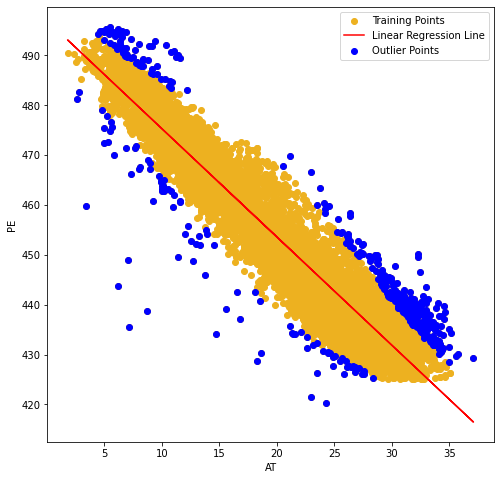

Predictor :  V
** Outlier points indices are :  Int64Index([   2,   21,   24,   47,   57,  154,  182,  199,  210,  213,
            ...
            9237, 9248, 9276, 9310, 9335, 9359, 9394, 9404, 9471, 9509],
           dtype='int64', length=423)


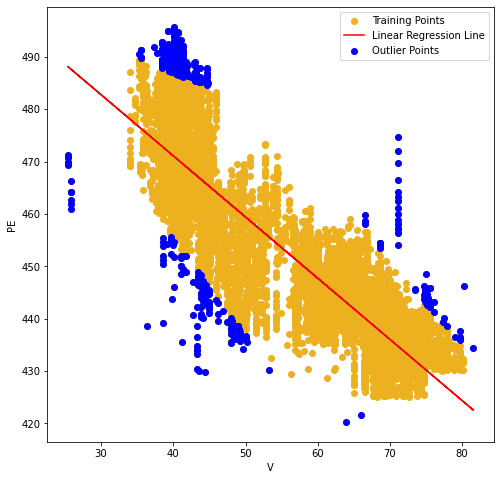

Predictor :  AP
** Outlier points indices are :  Int64Index([  21,   22,   57,   74,  114,  154,  191,  198,  199,  252,
            ...
            9237, 9264, 9275, 9310, 9326, 9366, 9459, 9483, 9521, 9542],
           dtype='int64', length=300)


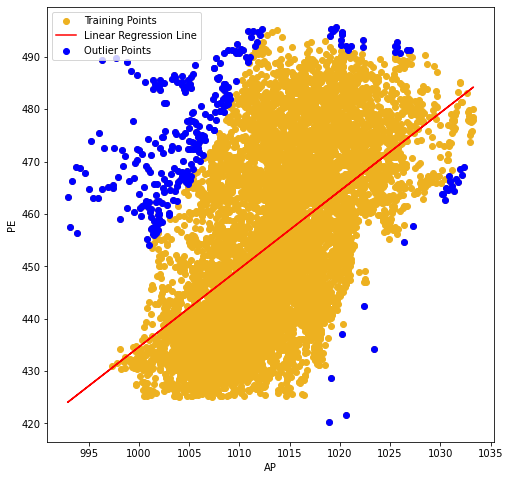

Predictor :  RH
** Outlier points indices are :  Int64Index([   8,   15,   16,   21,   48,   57,   82,  115,  154,  199,
            ...
            8953, 9018, 9097, 9115, 9116, 9124, 9204, 9361, 9469, 9495],
           dtype='int64', length=249)


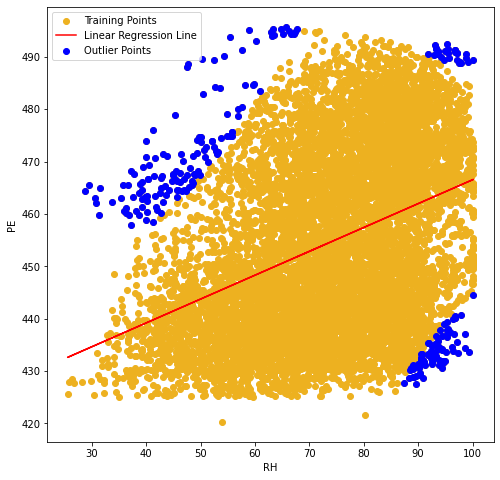

In [18]:
#HIGHLIGHTING OUTLIERS USING COOKS DISTANCE

outliers_list = []
X_overall = df.drop(['PE'], axis=1)
y = df['PE']

for i in X_overall.columns:
    X = X_overall[i]
    X_sm = sm.add_constant(X)
    lr = sm.OLS(y, X_sm).fit()
    print("Predictor : ", i)
    const = lr.params['const']
    slope = lr.params[i]
    
    influence = lr.get_influence()
    cook = influence.summary_frame()
    outliers_cook = cook[cook['cooks_d'] > 4/9568 ].index
    print("** Outlier points indices are : ", outliers_cook)
    figure(figsize=(8, 8))
    plt.scatter(X, y, color ='#EDB120', label='Training Points')
    plt.plot(X, (slope * X) + const, color = 'r', label='Linear Regression Line')
    plt.scatter(X[outliers_cook], y[outliers_cook], color = 'b', label='Outlier Points')
    plt.xlabel(i)
    plt.ylabel("PE")
    plt.legend()
    plt.show()
    

Since, the p-values for all the predictors AT, V, AP, RH are zero. All predictors variabes are statistically significant with the response variable. 

The plots shown above are each predictor vs the response variable, along with the simple linear regression line and outliers plotted in a different color. The mentioned outlier indices can be removed for other regression tasks. 

Plots are shown above back up the assertion. 

In [19]:
# print(model_params_const)
# print(model_params_slope)

# 1. (d)
Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

https://hastie.su.domains/ISLR2/ISLRv2_website.pdf

In [20]:
X_overall = df.drop(['PE'], axis=1)
y = df['PE']
X = sm.add_constant(X_overall) 
model = sm.OLS(y, X).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:13:02   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we have small p-values, we can infer that there is an association between the predictor and the response. We reject the null hypothesis that is, we declare a relationship to exist between X and Y if the p-value is small enough.

In this case, all predictor variables have a small p-value aka zero. Hence we reject Null Hypothesis (H0 : βj = 0) for all the predictors. All predictors are significant and should be used for predicting the response.

# 1. (e)
How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis

https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib

https://www.geeksforgeeks.org/how-to-annotate-matplotlib-scatter-plots/

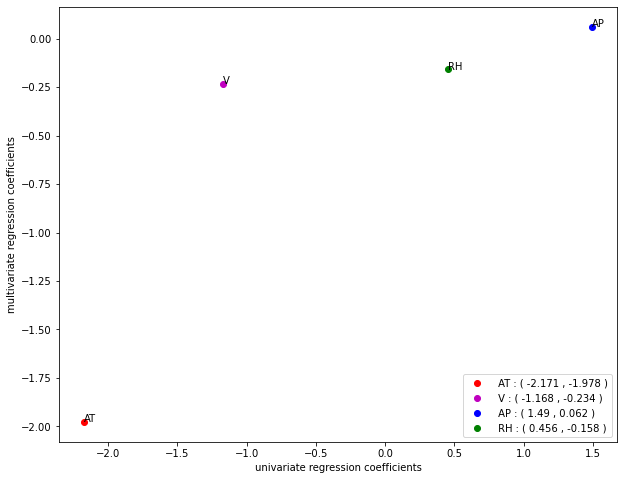

In [21]:
from matplotlib.pyplot import figure
columns = X_overall.columns
colors = ['r', 'm', 'b', 'g']

figure(figsize=(10, 8))
for i in range(4):
    X = X_overall[columns[i]]
    label = " {} : ( {} , {} )".format(columns[i], round(model_params_slope[i], 3) , round( model.params[columns[i]] , 3))
    plt.scatter(model_params_slope[i], model.params[columns[i]], color = colors[i], label=label)
    plt.text(model_params_slope[i], model.params[columns[i]], columns[i])

plt.xlabel("univariate regression coefficients")
plt.ylabel("multivariate regression coefficients")
plt.legend(loc = 'lower right')
plt.show()

# 1. (f)

Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2


Y = β0 + β1X + β2X2 + β3X3 + ε

https://www.statsmodels.org/devel/generated/statsmodels.formula.api.ols.html#statsmodels.formula.api.ols

https://www.statsmodels.org/stable/example_formulas.html

https://stackoverflow.com/questions/64181809/how-to-construct-cubic-regression-using-statsmodels-api

https://rpubs.com/alex_mirugwe/636591


In [22]:
formula='PE ~ AT + I(AT**2) + I(AT**3)'
model1 = smf.ols(formula= formula, data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:13:02   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.000     491.409     494.047
AT            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
I(AT ** 2)    -0.1251      0.007    -18.199      0.000      -0.139      -0.112
I(AT ** 3)     0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As p-values are small here zero, there is evidence of nonlinear association between predictor 'AT' and response 'PE'

In [25]:
formula='PE ~ V + I(V**2) + I(V**3)'
model2 = smf.ols(formula= formula, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:13:17   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.000     536.209     572.084
V             -2.1444      0.509     -4.214      0.000      -3.142      -1.147
I(V ** 2)     -0.0027      0.009     -0.294      0.768      -0.021       0.015
I(V ** 3)      0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since we consider threshold as 0.05 for p-values. Since for predictor V^2 the value exceeds the threshold, we infer there is no evidence of nonlinear association between predictor V^2 and response 'PE'. However, there is linear association between the remaining predictors and response.

In [26]:
formula='PE ~ RH + I(RH**2) + I(RH**3)'
model3 = smf.ols(formula= formula, data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:13:18   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.000     447.744     489.083
RH            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
I(RH ** 2)     0.0321      0.007      4.433      0.000       0.018       0.046
I(RH ** 3)    -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As p-values are small here zero, there is evidence of nonlinear association between predictor 'RH' and response 'PE'

In [27]:
formula='PE ~ AP + I(AP**2) + I(AP**3)'
model4 = smf.ols(formula= formula, data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:13:19   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.000       0.057       0.092
AP            25.2556      3.001      8.415      0.000      19.372      31.139
I(AP ** 2)    -0.0500      0.006     -8.439      0.000      -0.062      -0.038
I(AP ** 3)  2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As p-values are small here zero, there is evidence of nonlinear association between predictor 'AP' and response 'PE'

# 1. (g)

Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [28]:
formula = 'PE ~ AT + V + AP + RH + AT*V + AT*RH + AT*AP + V*RH + V*AP + RH*AP'
pairwise_model = smf.ols(formula= formula, data=df).fit()
pairwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:13:20   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
RH:AP         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since we consider threshold for p-values as 0.05, we observe p-value for AT:AP is considerably high. Hence we infer, AT:AP is statistically insignificant. Also, p-values for AT, V:RH are higher than the threshold 0.05, so they are also considered statistically insignificant. 

Predictors : V, RH, AP, AT:V, AT:RH, V:AP, RH:AP have p-values smaller than the threshold 0.05, so they are statistically significant.

# 1. (h) 
Improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

https://www.geeksforgeeks.org/how-to-do-train-test-split-using-sklearn-in-python/

https://stackoverflow.com/questions/13218461/predicting-values-using-an-ols-model-with-statsmodels

https://datagy.io/mean-squared-error-python/

https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

# 
regression model involving all possible interaction terms and quadratic nonlinearities and remove insignificant variables using p-values

In [31]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1', header=0, names=None)
train, test = train_test_split(df, test_size=0.3)

X_train, X_test, y_train, y_test = train.iloc[:, :4], test.iloc[:, :4], train.iloc[:, 4:], test.iloc[:, 4:]

In [32]:
#base line model
form_base = 'PE ~ AT + V + AP + RH'
base = smf.ols(formula = form_base, data=train).fit()
print(base.summary())

train_pred_1 = base.predict(X_train)
test_pred_1 = base.predict(X_test)

mse_train_1 = mean_squared_error(y_train, train_pred_1)
mse_test_1 = mean_squared_error(y_test, test_pred_1)

print("The Train data MSE is :", mse_train_1)
print("The Test data MSE is :", mse_test_1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:13:37   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    448.5613     11.745     38.192      0.0

In [33]:
# model with all interactions and quadratic non linearities

#form_all_interaction = 'PE ~ AT*V + AT*RH + AT*AP + V*RH + V*AP + RH*AP + I(AT**2) + I(AP**2) + + I(V**2) + + I(RH**2) + + I(AT**2)'
form_all_interaction = 'PE ~ AT + V + RH + AP + AT*V + AT*RH + AT*AP + V*RH + V*AP + RH*AP + I(AT**2) + I(AP**2) + I(V**2) + I(RH**2) + I(AT**2)'
all_interaction_model = smf.ols(formula = form_all_interaction, data=train).fit()
print(all_interaction_model.summary())

train_pred = all_interaction_model.predict(X_train)
test_pred = all_interaction_model.predict(X_test)

mse_train_2 = mean_squared_error(y_train, train_pred)
mse_test_2 = mean_squared_error(y_test, test_pred)

print("The Train data MSE with all interaction model is :", mse_train_2)
print("The Test data MSE with all interaction model is :", mse_test_2)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:13:38   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7073.1567   1505.522     -4.698      0.0

From the above run, considering the p-value threshold as 0.05. The predictors with values over 0.05 are insignificant variables. Therefore Predictors : AT:AP, V:RH, V:AP, V ** 2 are disregarded as they are insignificant variables.
Variables AT, V also have p values over 0.05 but we do not disregard it by principle of heirarchy

If the variable is insignificant but its polynomials or interaction terms are significant, then we do retain the variable.  Atleast that according to the principle of heirarchy. 

# 
Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms)

In [34]:
# model with all interactions and quadratic non linearities and removing insignificant variables

#form_significant_interaction = 'PE ~ AT + V + RH + AP + AT*V + AT*RH + V*AP + RH*AP + I(AP**2) + I(RH**2) + I(AT**2)'
form_significant_interaction  = 'PE ~ AT + V + RH + AP + AT*V + AT*RH + RH*AP + I(AP**2) + I(RH**2) + I(AT**2)'

significant_interaction_model = smf.ols(formula = form_significant_interaction, data=train).fit()
print(significant_interaction_model.summary())

train_pred = significant_interaction_model.predict(X_train)
test_pred = significant_interaction_model.predict(X_test)

mse_train_3 = mean_squared_error(y_train, train_pred)
mse_test_3 = mean_squared_error(y_test, test_pred)

print("The Train data MSE with all significant variables interaction model is :", mse_train_3)
print("The Test data MSE with all significant variables interaction model is :", mse_test_3)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9892.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:13:40   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.001e+04   1121.577     -8.921      0.0

In [35]:
model_params = {'Model-type': ['Base Model', 'Interactions + Quadratic Non Linearities', 'Significant Variables w Interactions + Quadratic Non Linearities'],
       'Train MSE': [mse_train_1, mse_train_2, mse_train_3],
       'Test MSE': [mse_test_1, mse_test_2, mse_test_3]
        }

model_params_df = pd.DataFrame(model_params)
model_params_df 

,Model-type,Train MSE,Test MSE
0,Base Model,20.941564,20.368383
1,Interactions + Quadratic Non Linearities,18.366012,17.520161
2,Significant Variables w Interactions + Quadrat...,18.399356,17.565670


# 1. (i). KNN Regression: 

i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

Using MSE to calculate errors :  https://machinelearningmastery.com/regression-metrics-for-machine-learning/#:~:text=There%20are%20three%20error%20metrics,Mean%20Absolute%20Error%20(MAE)



In [36]:
X = df.iloc[:,:4]
y = df['PE'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
k_list = [k for k in range(1,101)]

In [37]:
train_mse, test_mse = [], []

for k in k_list:
    regr = KNeighborsRegressor(n_neighbors = k)
    regr.fit(X_train, y_train)
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
    mse_train_knn = mean_squared_error(y_train, y_train_pred)
    mse_test_knn = mean_squared_error(y_test, y_test_pred)
    
    train_mse.append(mse_train_knn)
    test_mse.append(mse_test_knn)

k_min_train = k_list[train_mse.index(min(train_mse))]
k_min_test = k_list[test_mse.index(min(test_mse))]
print("FOR RAW FEATURES : ")
print("Min Training Error = {} is at k = {}".format(min(train_mse),k_min_train))
print("Min Testing Error = {} is at k = {}".format(min(test_mse),k_min_test))

FOR RAW FEATURES : 
Min Training Error = 0.0 is at k = 1
Min Testing Error = 15.6635051689307 is at k = 5


# Normalised features with MinMax Scalar

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [38]:
scaler = MinMaxScaler()

scal_train = scaler.fit_transform(train)
scal_test = scaler.fit_transform(test)

X_scal_train = scal_train[:,:4]
X_scal_test = scal_test[:,:4]
y_scal_train = train.iloc[:,4:]
y_scal_test = test.iloc[:,4:]

scal_train_errors, scal_test_errors = [], []

for k in k_list:
    scal_regr = KNeighborsRegressor(n_neighbors=k)
    scal_regr.fit(X_scal_train, y_scal_train)
    y_train_pred = scal_regr.predict(X_scal_train)
    y_test_pred = scal_regr.predict(X_scal_test)
    scal_train_mse = mean_squared_error(y_scal_train, y_train_pred)
    scal_test_mse = mean_squared_error(y_scal_test, y_test_pred)
    
    scal_train_errors.append(scal_train_mse)
    scal_test_errors.append(scal_test_mse)
    
k_min_scal_train = k_list[scal_train_errors.index(min(scal_train_errors))]
k_min_scal_test = k_list[scal_test_errors.index(min(scal_test_errors))]

print("FOR NORMALIZED (MINMAX SCALER) FEATURES : ")
print("Min Training Error = {} is at k = {}".format(min(scal_train_errors), k_min_scal_train))
print("Min Testing Error = {} is at k = {}".format(min(scal_test_errors), k_min_scal_test))
    

FOR NORMALIZED (MINMAX SCALER) FEATURES : 
Min Training Error = 0.0 is at k = 1
Min Testing Error = 14.659682056194127 is at k = 6


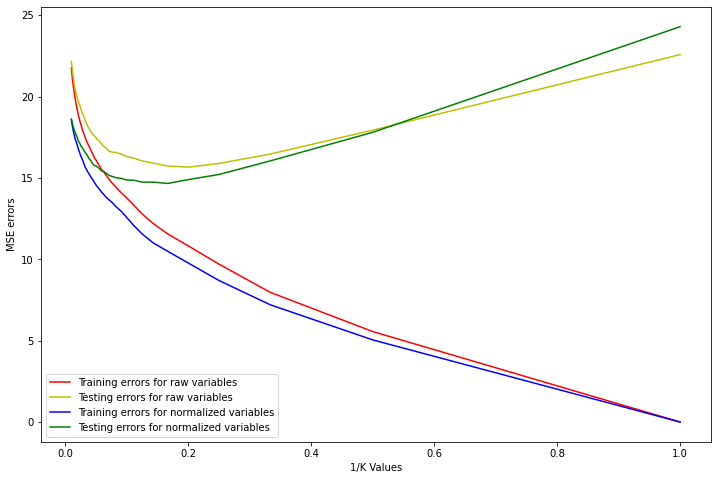

In [39]:
new_k_list = [1/k for k in k_list]
figure(figsize=(12, 8))
plt.plot(new_k_list, train_mse, color = 'r', label = 'Training errors for raw variables')
plt.plot(new_k_list, test_mse, color = 'y', label = 'Testing errors for raw variables')
plt.plot(new_k_list, scal_train_errors, color = 'b', label = 'Training errors for normalized variables')
plt.plot(new_k_list, scal_test_errors, color = 'g', label = 'Testing errors for normalized variables')
plt.xlabel('1/K Values')
plt.ylabel('MSE errors')
plt.legend()

# with normalized features 

https://stats.stackexchange.com/questions/240056/normalizing-features-for-use-with-knn

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

In [40]:
# from sklearn.preprocessing import Normalizer
# # reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer.get_feature_names_out
# norm_train = Normalizer().fit_transform(train)
# norm_test = Normalizer().fit_transform(test)

# X_norm_train = norm_train[:,:4]
# X_norm_test = norm_test[:,:4]

# y_norm_train = train.iloc[:,4:]
# y_norm_test = test.iloc[:,4:]

# norm_train_errors, norm_test_errors = [], []

# for k in k_list:
#     norm_regr = KNeighborsRegressor(n_neighbors=k)
#     norm_regr.fit(X_norm_train, y_norm_train)
#     y_train_pred = norm_regr.predict(X_norm_train)
#     y_test_pred = norm_regr.predict(X_norm_test)
#     norm_train_mse = mean_squared_error(y_norm_train, y_train_pred)
#     norm_test_mse = mean_squared_error(y_norm_test, y_test_pred)
    
#     norm_train_errors.append(norm_train_mse)
#     norm_test_errors.append(norm_test_mse)
    
# k_min_norm_train = k_list[norm_train_errors.index(min(norm_train_errors))]
# k_min_norm_test = k_list[norm_test_errors.index(min(norm_test_errors))]
# print("FOR NORMALIZED FEATURES : ")
# print("Min Training Error = {} is at k = {}".format(min(norm_train_errors), k_min_norm_train))
# print("Min Testing Error = {} is at k = {}".format(min(norm_test_errors), k_min_norm_test))
    

In [41]:
## PLOT For NORMALIZED AND RAW
# new_k_list = [1/k for k in k_list]
# figure(figsize=(12, 8))
# plt.plot(new_k_list, train_mse, color = 'r', label = 'Training errors for raw variables')
# plt.plot(new_k_list, test_mse, color = 'y', label = 'Testing errors for raw variables')
# plt.plot(new_k_list, norm_train_errors, color = 'b', label = 'Training errors for normalized variables')
# plt.plot(new_k_list, norm_test_errors, color = 'g', label = 'Testing errors for normalized variables')
# plt.xlabel('1/K Values')
# plt.ylabel('MSE errors')
# plt.legend()

# 1. (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [42]:
lin_regression_min_test_error = min(mse_test_1, mse_test_2, mse_test_3)

data = {'Model': ['Linear Regression Model','KNN Regression Model with Raw Features' ,'KNN Regression Model with Normalised Features'],
       'Min Testing MSE': [lin_regression_min_test_error, min(test_mse), min(scal_test_errors)]
        }

df = pd.DataFrame(data)
df


,Model,Min Testing MSE
0,Linear Regression Model,17.520161
1,KNN Regression Model with Raw Features,15.663505
2,KNN Regression Model with Normalised Features,14.659682


# 2. ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.

ANS : With a flexible statistical learning method, we can expect a better performance over an inflexible one. Given the large sample size n, we can fit the method to the true distribution without the risk of underfitting which can occur in the inflexible approach. Also given the small number of predictors, the cost of using a flexible method will not be too high.

(b) The number of predictors p is extremely large, and the number of observations n is small.

ANS : In this scenario, since the number of observations is small flexible method will have higher risk of overfitting as the method will pick up nosiy patterns. Hence, an inflexible method is a more suitable choice.


(c) The relationship between the predictors and response is highly non-linear.

ANS : An inflexible method is generally not versatile enough to capture non-linear relationships. Thus, a flexible statistical learning method is preferred over inflexible methods, as they are better equipped to pick non-linear patterns between the predictors and response.


(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

ANS: The high variance of error terms indicates the sample of observations has a lot of noise. The flexible method has a higher risk of overfitting the data. Hence to reduce the risk of overfitting, using the inflexible method would be a more appropriate choice.

# 3. ISLR: 2.4.7


 (a) Compute the Euclidean distance between each observation and the test point, X1 =X2 =X3 =0.
 
 ANS : Euclidian distance is sqrt((x1)^2 + (x2)^2 + (x3)^2 )
 
 Observation 1 -> sqrt((0-0) ^ 2 + (3-0) ^ 2 + (0-0) ^ 2 ) = sqrt((3) ^ 2) = 3
 
 Observation 2 -> sqrt((2-0) ^ 2 + (0-0) ^ 2 + (0-0) ^ 2 ) = sqrt((2) ^ 2) = 2
 
 Observation 3 -> sqrt((0-0) ^ 2 + (1-0) ^ 2 + (3-0) ^ 2 ) = sqrt((1) ^ 2 + (3) ^ 2) = 3.1622 ~ 3.16
 
 Observation 4 -> sqrt((0-0) ^ 2 + (1-0) ^ 2 + (2-0) ^ 2 ) = sqrt((1) ^ 2 + (2) ^ 2) = 2.2361 ~ 2.24
 
 Observation 5 -> sqrt((-1-0) ^ 2 + (0-0) ^ 2 + (1-0) ^ 2 ) = sqrt((1) ^ 2 + (1) ^ 2) = 1.4142 ~ 1.41
 
 Observation 6 -> sqrt((1-0) ^ 2 + (1-0) ^ 2 + (1-0) ^ 2 ) = sqrt((1) ^ 2 + (1) ^ 2 + (1) ^ 2) = 1.7321 ~ 1.73
 


(b) What is our prediction with K = 1? Why?

ANS : For K = 1, the nearest nearest neighbour to test point X1=X2=X3=0 i.e. (0,0,0) is Observation5 X1=-1,X2=0,X3=1 i.e. (−1,0,1). Since it has the least euclidean distance of ~1.41 from the test point. Since Observation 5 is coded Green, The test point is also predicted to be "GREEN"

(c) What is our prediction with K = 3? Why?

ANS : For K = 3, we consider the 3 nearest neighbours to the test point  X1=X2=X3=0 i.e. (0,0,0). 

The three nearest points with the least Euclidean distances are :

Observation5   X1=-1, X2=0, X3=1   i.e.  (−1,0,1)    ~1.41

Observation6   X1=1, X2=1, X3=1    i.e.  (1,1,1)     ~1.73

Observation2   X1=2, X2=0, X3=0    i.e.  (2,0,0)     ~2.00

The Observation6 and Observation2 are coded Red and Observation5 is coded Green. Hence by majority, thes test point will be predicted to be "RED"


(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

ANS: A small k value would be preferred in this case as a flexible statistical learning method is preferred over inflexible methods, since they are better equipped to pick non-linear patterns between the predictors and response
